# *Fraud_check Dataset*

In [ ]:
# import the liberaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
fraud_check = pd.read_csv("Fraud_check.csv")
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# **EDA**

In [ ]:
fraud_check.shape

(600, 6)

In [ ]:
# checking the type of data

fraud_check.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [ ]:
# lets check the information about data

fraud_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
fraud_check.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

there is not any null values in our dataset

In [ ]:
# lets check if there is any duplicate values
fraud_check[fraud_check.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [ ]:
# lets check some statistical information

fraud_check.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


we have to scale our dataset

In [ ]:
fraud_check['Taxable.Income'] = np.where( fraud_check['Taxable.Income'] <= 30000, 1, 0)


In [ ]:
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,0,50047,10,YES
1,YES,Divorced,0,134075,18,YES
2,NO,Married,0,160205,30,YES
3,YES,Single,0,193264,15,YES
4,NO,Married,0,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,0,39492,7,YES
596,YES,Divorced,0,55369,2,YES
597,NO,Divorced,0,154058,0,YES
598,YES,Married,0,180083,17,NO


In [ ]:
fraud_check['Taxable.Income'].value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

In [ ]:
fraud_check=pd.get_dummies(fraud_check,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)


In [ ]:
fraud_check

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0,50047,10,0,0,1,1
1,0,134075,18,1,0,0,1
2,0,160205,30,0,1,0,1
3,0,193264,15,1,0,1,1
4,0,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,0,39492,7,1,0,0,1
596,0,55369,2,1,0,0,1
597,0,154058,0,0,0,0,1
598,0,180083,17,1,1,0,0


In [ ]:
def norm_fucn(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [ ]:
fraud2=norm_fucn(fraud_check)

In [ ]:
fraud2

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.0,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.0,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.0,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.0,0.010081,0.933333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
595,0.0,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.0,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.0,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.0,0.886810,0.566667,1.0,1.0,0.0,0.0


In [ ]:
x=fraud2.iloc[:,1:]
y=fraud2.iloc[:,0]

In [ ]:
x

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0


In [ ]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
595    0.0
596    0.0
597    0.0
598    0.0
599    0.0
Name: Taxable.Income, Length: 600, dtype: float64

In [ ]:
# Splitting data into training and testing data set
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=90)

# **Building Decision Tree Classifier using Entropy Criteria**

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

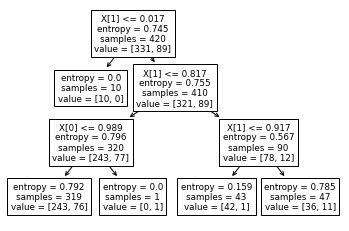

In [ ]:
tree.plot_tree(model);

Text(0.5, 1.0, 'Decision tree using Entropy')

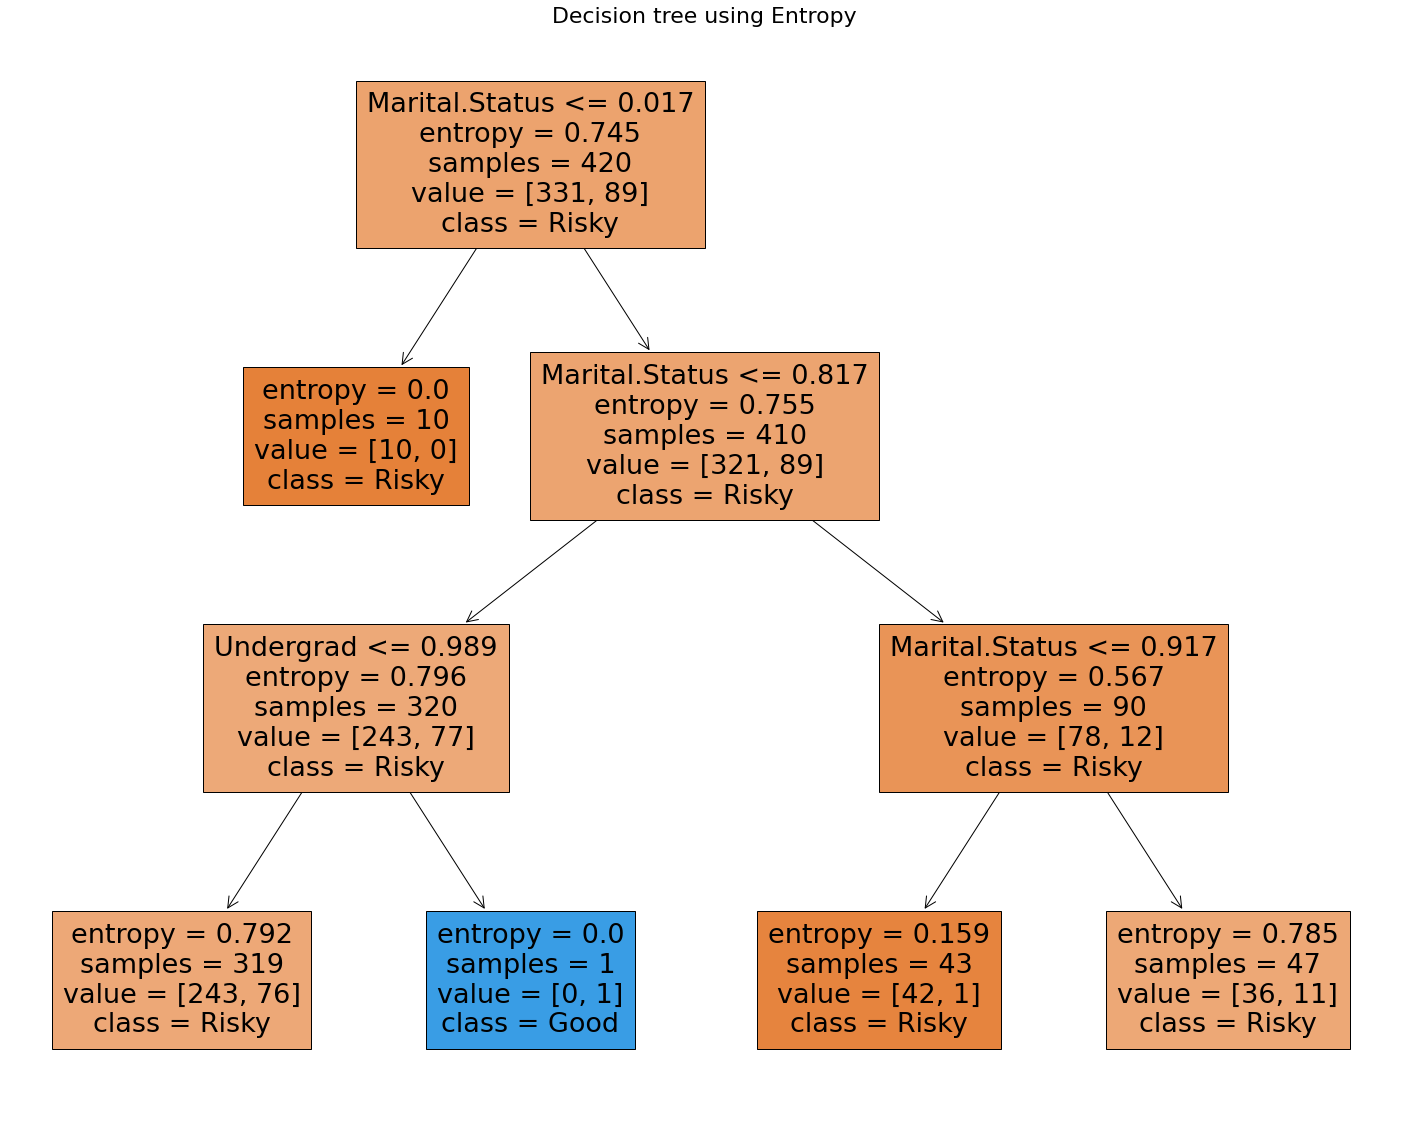

In [ ]:
# let's plot the decision tree
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model,
feature_names= ['Undergrad','Marital.Status','City.Population','Work.Experience'], class_names= ['Risky', 'Good'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

# Prediction

In [ ]:
predict=model.predict(x_test)

In [ ]:
pd.crosstab(y_test,predict)

col_0,0.0,1.0
Taxable.Income,,
0.0,144,1
1.0,34,1


In [ ]:
y_test.value_counts()

0.0    145
1.0     35
Name: Taxable.Income, dtype: int64

In [ ]:
# Accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predict)

0.8055555555555556

In [ ]:
model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=4)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
predict=model2.predict(x_test)

In [ ]:
accuracy_score(y_test,predict)

0.8055555555555556

# Bulinding a maodel using Gini index

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_gini1 = DecisionTreeClassifier(criterion='gini', max_depth=2)
model_gini1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [ ]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(predict==y_test)

0.8055555555555556

# **Company_Dataset**

In [91]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [92]:
company=pd.read_csv('Company_Data.csv')

In [94]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# **EDA**

In [96]:
company.shape

(400, 11)

In [98]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [99]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [100]:
# lets check if there is any duplicate values
company[company.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [101]:
# lets check some statistical information

company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [102]:
company["highsales"] = np.where((company["Sales"] < 9),"Low","High")

In [103]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,highsales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,High
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Low
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Low
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Low


In [105]:
company2=company.iloc[:,1:]
company2.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,highsales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [106]:
# changing the categorical values
label_encoder=preprocessing.LabelEncoder()
company2['ShelveLoc']=label_encoder.fit_transform(company2['ShelveLoc'])
company2['Urban']=label_encoder.fit_transform(company2['Urban'])
company2['US']=label_encoder.fit_transform(company2['US'])
company2['highsales']=label_encoder.fit_transform(company2['highsales'])



In [107]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,highsales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [108]:
# spliting data into input and output
x=company2.iloc[:,:-1]
y=company2.iloc[:,-1]

In [110]:
x.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0


In [111]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: highsales, dtype: int64

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=90)

# Building Decision Tree Classification Model

In [112]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

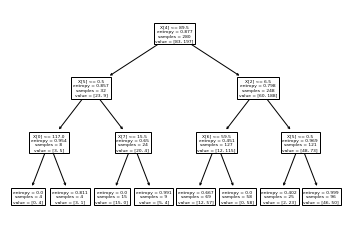

In [113]:
tree.plot_tree(model);

In [115]:
x.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

Text(0.5, 1.0, 'Decision tree using Entropy')

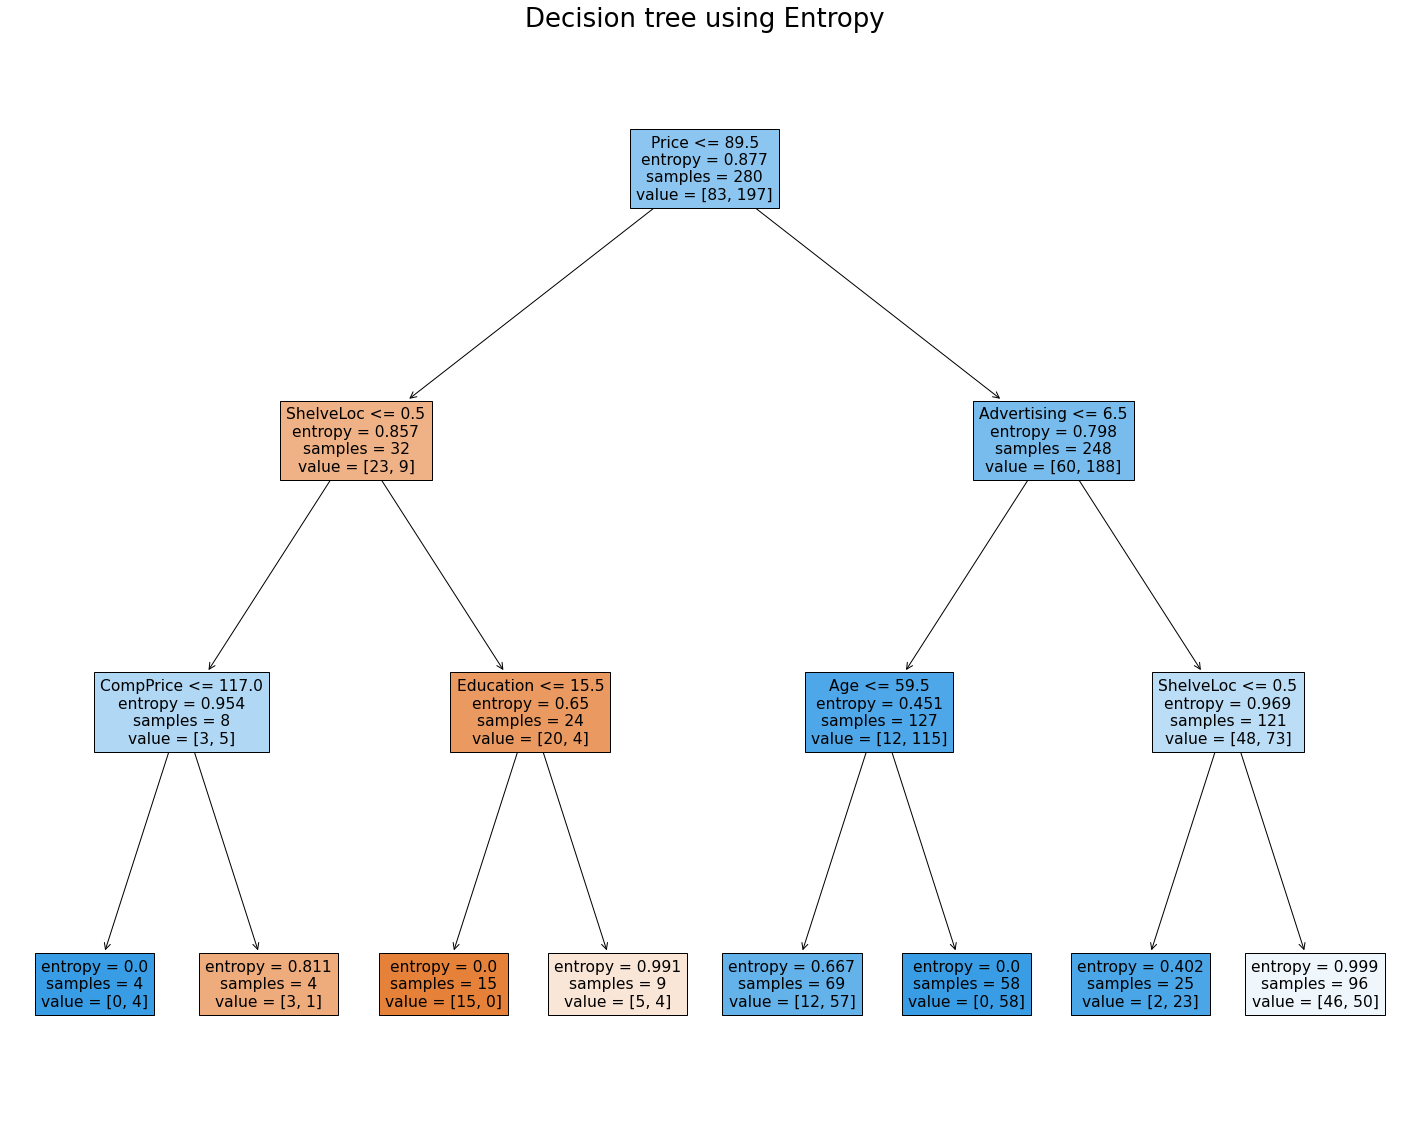

In [117]:
# let's plot the decision tree
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model,
feature_names= ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US'], filled=True)
plt.title('Decision tree using Entropy',fontsize=26)

# Prediction

In [118]:
predict=model.predict(x_test)

In [119]:
pd.Series(predict).value_counts()

1    106
0     14
dtype: int64

In [120]:
pd.crosstab(y_test,predict)

col_0,0,1
highsales,,
0,11,20
1,3,86


In [121]:
# Accuracy 
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predict)

0.8083333333333333

In [122]:
model2=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [123]:
predict=model2.predict(x_test)

In [124]:
accuracy_score(y_test,predict)

0.7583333333333333

as we see that when we increase the maxdepth our accuracy is decreased.

In [125]:
from sklearn.tree import DecisionTreeClassifier
model_gini1 = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [126]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(predict==y_test)

0.7583333333333333

So we can conclude from these that our entropy creterion gives a good accuracy.